<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> LIAR-PLUS Fake News Analysis System</b></div>


<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Fake News Analysis System using Bag of Words 

<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [5]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [19]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Folder path and file names


COLUMN_NAMES = ['id', 'label', 'statement', 'subject', 'speaker',
               'speakers_job', 'state_info', 'party_aff', 'bt_cnt',
               'f_cnt', 'ht_cnt', 'mt_cnt', 'pf_cnt', 'context',
               'justification']

folder_path = 'Dataset/'
files = ['test2.tsv', 'train2.tsv', 'val2.tsv']

# Read all files into separate dataframes and combine them
dfs = [pd.read_csv(folder_path + file, sep='\t', names = COLUMN_NAMES) for file in files]
dataset = pd.concat(dfs, ignore_index=True)

#Load the Training Data
print("Dataset Data:")
print("=============\n")
dataset

Dataset Data:



,id,label,statement,subject,speaker,speakers_job,state_info,party_aff,bt_cnt,f_cnt,ht_cnt,mt_cnt,pf_cnt,context,justification
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview,"Meantime, engineering experts agree the wall w..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference,She cited layoff notices received by the state...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,a radio show,"But spending still goes up. In addition, many ..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,2.0,2.0,7.0,a web video,Our rating A Democratic Party web video making...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12788,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,"In 2009, 17 percent of the U. S. 's oil import..."
12789,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,"Clinton said, Trump has ""bankrupted his compan..."
12790,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad,"""I don't think that there should be a mandate ..."
12791,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,But the poll doesn't say that. Several days af...


In [21]:
# Keep only 'airline_sentiment' and 'text' columns
dataset = dataset[['statement', 'label']]
dataset

,statement,label
0,Building a wall on the U.S.-Mexico border will...,true
1,Wisconsin is on pace to double the number of l...,false
2,Says John McCain has done nothing to help the ...,false
3,Suzanne Bonamici supports a plan that will cut...,half-true
4,When asked by a reporter whether hes at the ce...,pants-fire
...,...,...
12788,"For the first time in more than a decade, impo...",half-true
12789,Says Donald Trump has bankrupted his companies...,mostly-true
12790,"John McCain and George Bush have ""absolutely n...",true
12791,A new poll shows 62 percent support the presid...,false


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [24]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (12793, 2)


In [26]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['statement', 'label'], dtype='object')


In [28]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

statement    object
label        object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:15px ; color:#034914">

**Tweet**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [31]:
dataset.describe(include='all')

,statement,label
count,12791,12791
unique,12765,6
top,On changing the rules for filibusters on presi...,half-true
freq,3,2627


In [33]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tweet**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [36]:
show_details(dataset)

,statement,label
Missed_Values,2.000000,2.000000
Missed_Values %,0.000156,0.000156
Duplicated values,21.000000,21.000000
Duplicated values %,0.001642,0.001642


In [38]:
print('The Count of Label in the dataset : \n')
Sentiment =dataset.label.value_counts()
Sentiment.to_frame()

The Count of Label in the dataset : 



,count
label,
half-true,2627
false,2507
mostly-true,2454
barely-true,2103
true,2053
pants-fire,1047


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [42]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

,statement,label
Missed_Values,0.0,0.0
Missed_Values %,0.0,0.0
Duplicated values,0.0,0.0
Duplicated values %,0.0,0.0


# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [46]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# Example contractions dictionary
contractions_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "couldn't": "could not",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'll": "he will",
  "here's": "here is",
  "how's": "how is",
  "i'd": "i would",
  "i'll": "i will",
  "i'm": "i am",
  "isn't": "is not",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mightn't": "might not",
  "mustn't": "must not",
  "shan't": "shall not",
  "she'd": "she would",
  "she'll": "she will",
  "that's": "that is",
  "there's": "there is",
  "they'd": "they would",
  "they're": "they are",
  "they've": "they have",
  "this's": "this is",
  "wasn't": "was not",
  "we'd": "we would",
  "we'll": "we will",
  "weren't": "were not",
  "what's": "what is",
  "when's": "when is",
  "where's": "where is",
  "who's": "who is",
  "why's": "why is",
  "won't": "will not",
  "you'd": "you would",
  "you'll": "you will",
  "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
  """
  Expands contractions in text using a dictionary.

  Args:
    text: The text to be processed.
    contractions_dict: A dictionary of contractions and their expansions.

  Returns:
    The expanded text.
  """
  expanded_text = []
  for word in text.split():
    if word.lower() in contractions_dict:
      expanded_text.append(contractions_dict[word.lower()])
    else:
      expanded_text.append(word)
  return " ".join(expanded_text)


dataset['statement'] = dataset['statement'].apply(expand_contractions, args=(contractions_dict,))
dataset

,statement,label
0,Building a wall on the U.S.-Mexico border will...,true
1,Wisconsin is on pace to double the number of l...,false
2,Says John McCain has done nothing to help the ...,false
3,Suzanne Bonamici supports a plan that will cut...,half-true
4,When asked by a reporter whether hes at the ce...,pants-fire
...,...,...
12788,"For the first time in more than a decade, impo...",half-true
12789,Says Donald Trump has bankrupted his companies...,mostly-true
12790,"John McCain and George Bush have ""absolutely n...",true
12791,A new poll shows 62 percent support the presid...,false


In [51]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    # text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [53]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['statement'] = dataset['statement'].apply(data_preprocessing)

print("\nData After Pre-processing:")
print("====================================\n")
dataset


Data After Pre-processing:



,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire
...,...,...
12788,first time decade imports accounted less half ...,half-true
12789,says donald trump bankrupted companies twice f...,mostly-true
12790,john mccain george bush absolutely plan univer...,true
12791,new poll shows percent support presidents plan...,false


In [55]:
def filter_tweets_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    dataset['Num_Words'] = dataset['statement'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_tweets_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire


In [57]:
dataset

,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire
...,...,...
12788,first time decade imports accounted less half ...,half-true
12789,says donald trump bankrupted companies twice f...,mostly-true
12790,john mccain george bush absolutely plan univer...,true
12791,new poll shows percent support presidents plan...,false


In [59]:
dataset = dataset.reset_index(drop=True)
dataset

,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire
...,...,...
12695,first time decade imports accounted less half ...,half-true
12696,says donald trump bankrupted companies twice f...,mostly-true
12697,john mccain george bush absolutely plan univer...,true
12698,new poll shows percent support presidents plan...,false


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [62]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['statement', 'label'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 12700


In [64]:
dataset.describe()

,statement,label
count,12700,12700
unique,12688,6
top,support gay marriage,half-true
freq,3,2609


In [66]:
print('The Count of label in the dataset : \n')
Sentiment =dataset.label.value_counts()
Sentiment.to_frame().T

The Count of label in the dataset : 



label,half-true,false,mostly-true,barely-true,true,pants-fire
count,2609,2465,2448,2098,2036,1044


In [68]:
dataset

,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire
...,...,...
12695,first time decade imports accounted less half ...,half-true
12696,says donald trump bankrupted companies twice f...,mostly-true
12697,john mccain george bush absolutely plan univer...,true
12698,new poll shows percent support presidents plan...,false


In [70]:
print(f'The unique values of Sentiments : {len(dataset.label.unique())}')
print('**' * 20)
print(dataset.label.unique())

The unique values of Sentiments : 6
****************************************
['true' 'false' 'half-true' 'pants-fire' 'barely-true' 'mostly-true']



Number of instances and Classes in  Dataset:



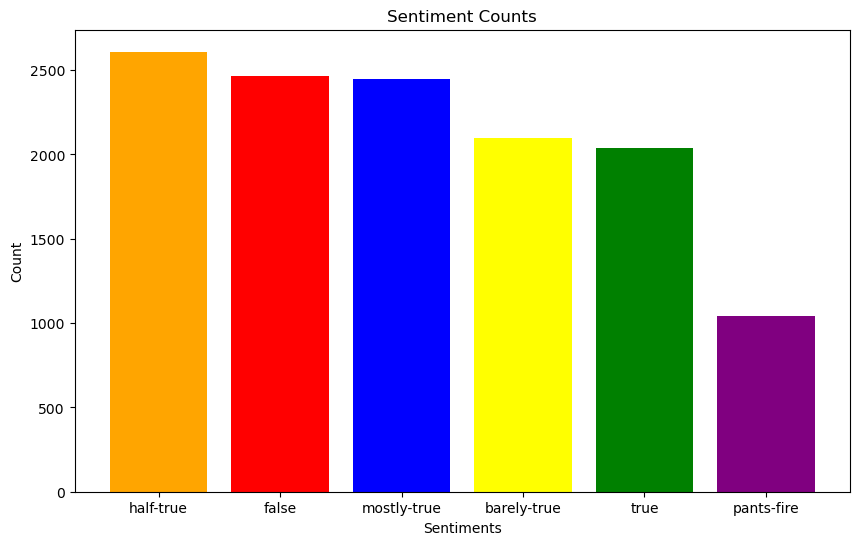

In [72]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in  Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['label'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
# Define a color for each new label
colors = {
    'true': 'green', 
    'false': 'red', 
    'half-true': 'orange', 
    'pants-fire': 'purple', 
    'barely-true': 'yellow', 
    'mostly-true': 'blue'
}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the bar graph
plt.show()


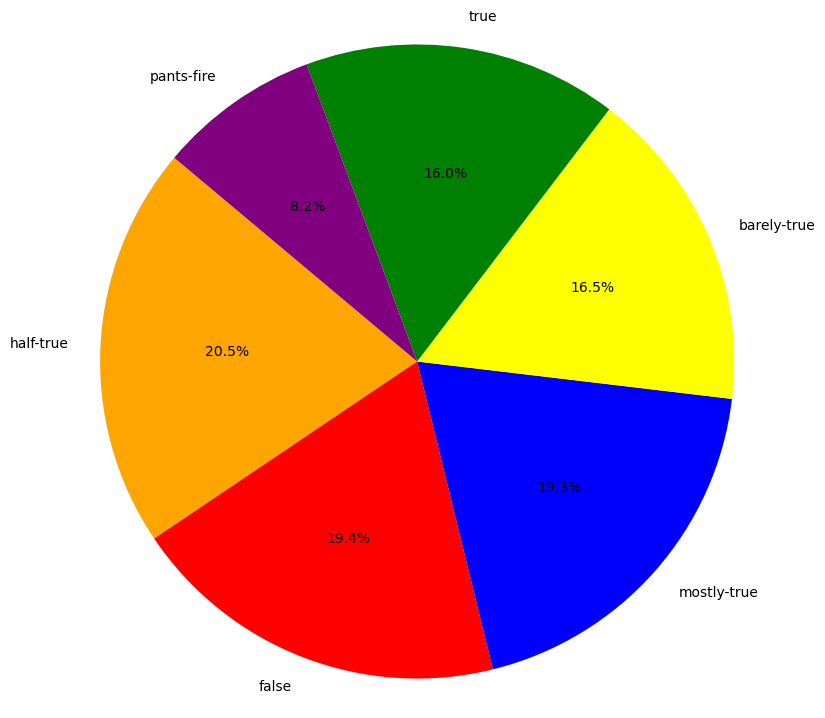

In [74]:
sentiment_counts = dataset['label'].value_counts()

# Define colors for each sentiment
# Define a color for each new label
colors = {
    'true': 'green', 
    'false': 'red', 
    'half-true': 'orange', 
    'pants-fire': 'purple', 
    'barely-true': 'yellow', 
    'mostly-true': 'blue'
}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Shape of the Training Data

In [77]:
dataset.shape

(12700, 2)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [89]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['statement'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["label"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['statement'].str.split().apply(lambda x : [len(i) for i in x])
print("\n Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


 Data After Tokenization :



,statement,label,Token_Length
0,"[building, wall, usmexico, border, take, liter...",true,"[8, 4, 8, 6, 4, 9, 5]"
1,"[wisconsin, pace, double, number, layoffs, year]",false,"[9, 4, 6, 6, 7, 4]"
2,"[says, john, mccain, done, nothing, help, vets]",false,"[4, 4, 6, 4, 7, 4, 4]"


### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [93]:
preprocessed_dataset['Tweet length'] = preprocessed_dataset['statement'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['statement'].apply(lambda x: len(str(x).split()))
preprocessed_dataset

,statement,label,Tweet length,word_count
0,building wall usmexico border take literally y...,true,50,7
1,wisconsin pace double number layoffs year,false,41,6
2,says john mccain done nothing help vets,false,39,7
3,suzanne bonamici supports plan cut choice medi...,half-true,68,9
4,asked reporter whether hes center criminal sch...,pants-fire,99,15
...,...,...,...,...
12695,first time decade imports accounted less half ...,half-true,58,9
12696,says donald trump bankrupted companies twice f...,mostly-true,55,8
12697,john mccain george bush absolutely plan univer...,true,61,9
12698,new poll shows percent support presidents plan...,false,141,20


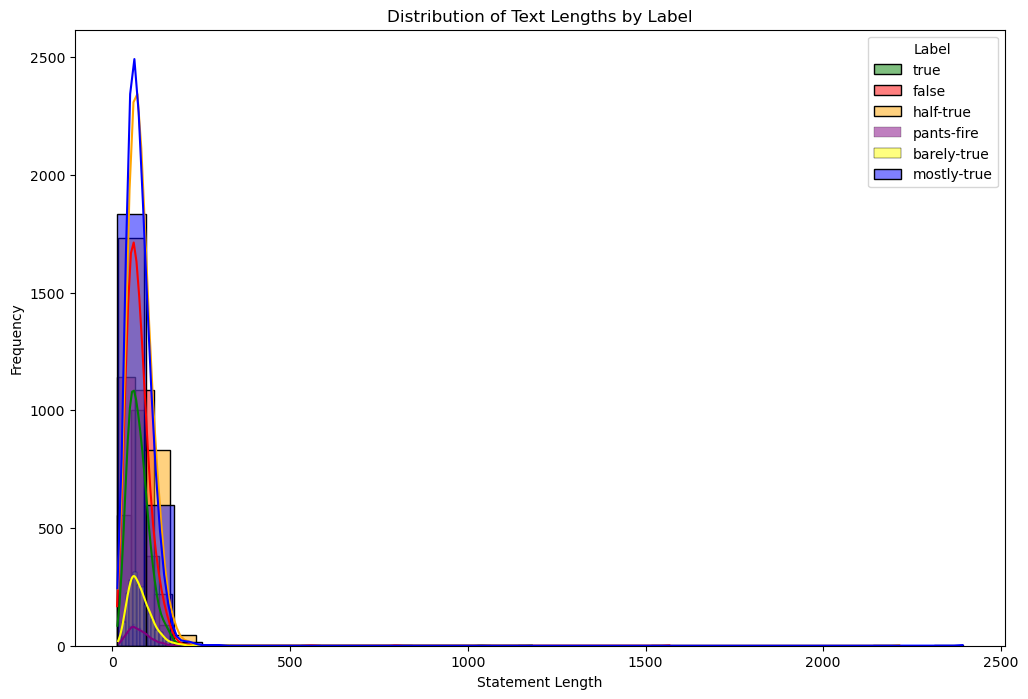

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'preprocessed_dataset' is already loaded into your workspace
# Calculate the length of each statement
preprocessed_dataset['statement_length'] = preprocessed_dataset['statement'].apply(len)

# Define the colors for each label category
colors = {
    'true': 'green', 
    'false': 'red', 
    'half-true': 'orange', 
    'pants-fire': 'purple', 
    'barely-true': 'yellow', 
    'mostly-true': 'blue'
}

# Plot the distribution of statement lengths for each label category
plt.figure(figsize=(12, 8))

# Loop through each unique label to plot its distribution
for label in preprocessed_dataset['label'].unique():
    subset = preprocessed_dataset[preprocessed_dataset['label'] == label]
    sns.histplot(subset['statement_length'], kde=True, bins=30, color=colors[label], label=label)

plt.title('Distribution of Text Lengths by Label')
plt.legend(title='Label')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')
plt.show()


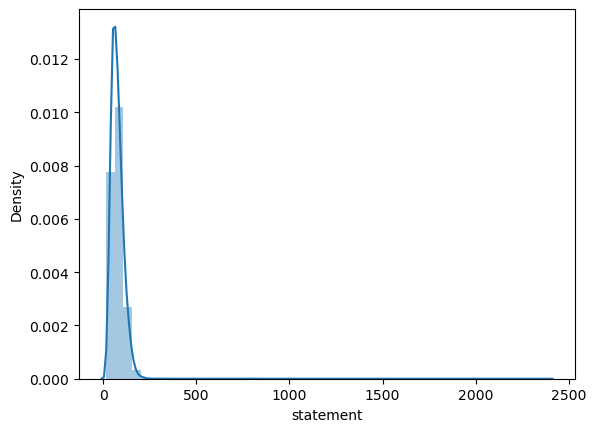

In [99]:
import seaborn as sns
text_length=preprocessed_dataset['statement'].str.len()
sns.distplot(text_length)
plt.show()

In [101]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

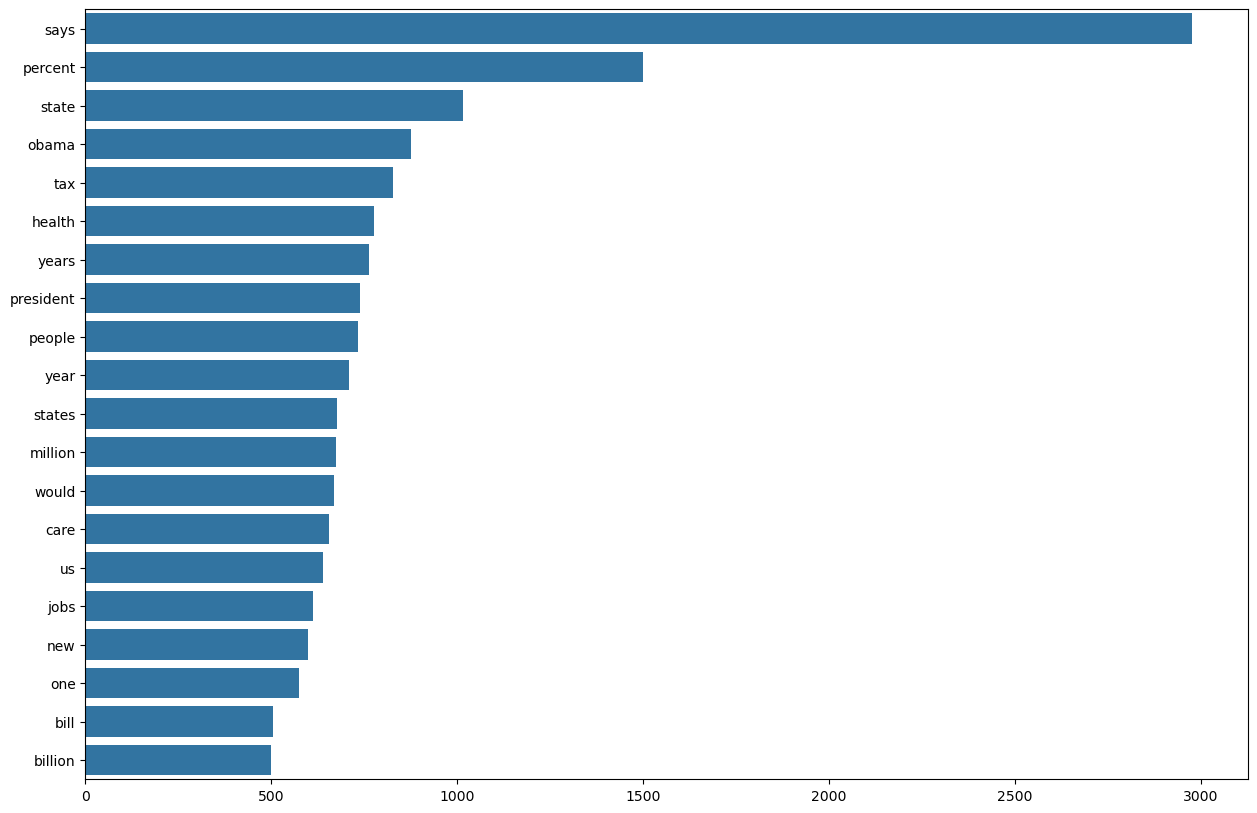

In [103]:
plot_top_non_stopwords_barchart(preprocessed_dataset['statement'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

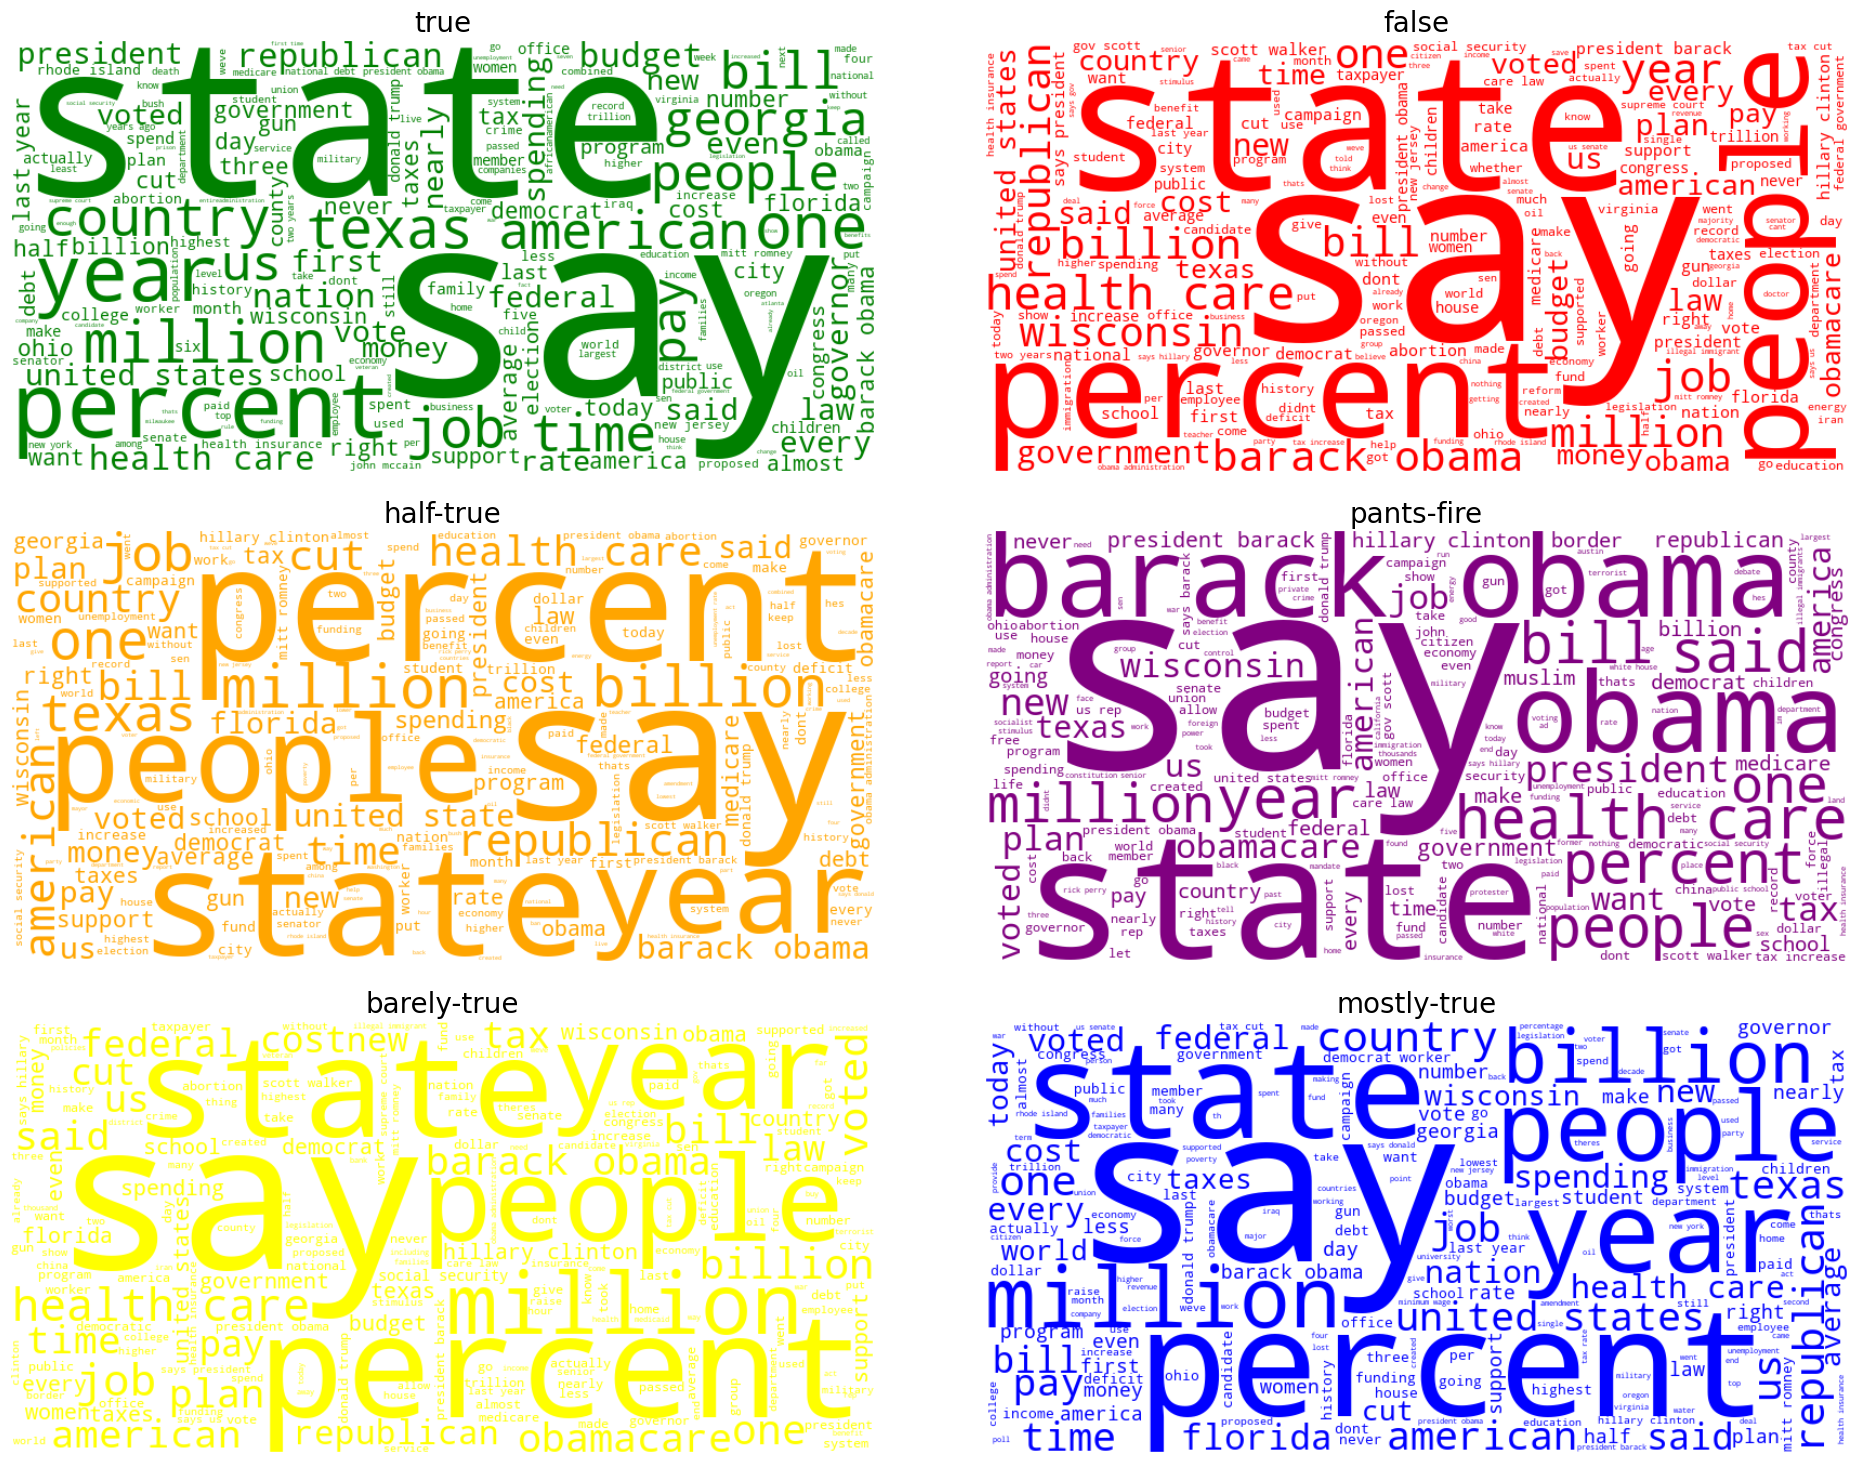

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'preprocessed_dataset' is already loaded into your workspace

# Colors mapped to RGB tuples for custom color functions
color_map = {
    'true': (0, 128, 0),  # Dark green
    'false': (255, 0, 0),  # Red
    'half-true': (255, 165, 0),  # Orange
    'pants-fire': (128, 0, 128),  # Purple
    'barely-true': (255, 255, 0),  # Yellow
    'mostly-true': (0, 0, 255)  # Blue
}

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color = color_map[kwargs['label']]
    return "rgb({}, {}, {})".format(color[0], color[1], color[2])

# Create a figure with subplots: Adjust the size and layout as needed based on the number of labels
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array if needed

for index, label in enumerate(preprocessed_dataset['label'].unique()):
    # Generate a WordCloud for each label
    text = ' '.join(preprocessed_dataset[preprocessed_dataset['label'] == label]['statement'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          color_func=lambda *args, **kwargs: color_func(*args, **kwargs, label=label)).generate(text)
    
    # Plot
    axes[index].imshow(wordcloud, interpolation='bilinear')
    axes[index].axis('off')
    axes[index].set_title(label, fontsize=20)

plt.tight_layout(pad=2)
plt.show()


## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [112]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['statement'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

,Word,count
0,says,2977
1,percent,1500
2,state,1017
3,obama,877
4,tax,828
5,health,776
6,years,764
7,president,740
8,people,734
9,year,708


Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

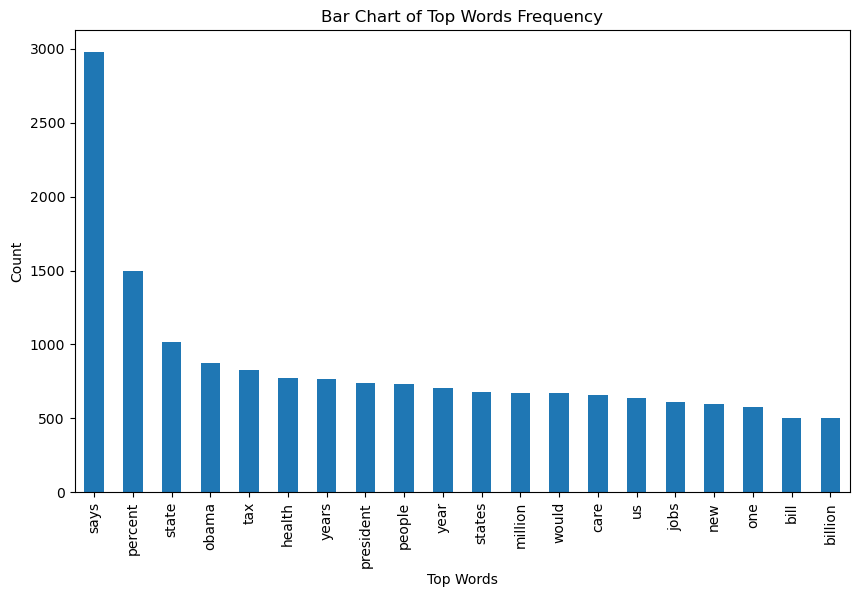

In [115]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [117]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['statement'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

,Text,Count
0,health care,528
1,united states,356
2,barack obama,354
3,hillary clinton,203
4,president barack,201
5,social security,160
6,donald trump,149
7,president obama,148
8,mitt romney,131
9,health insurance,131


<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

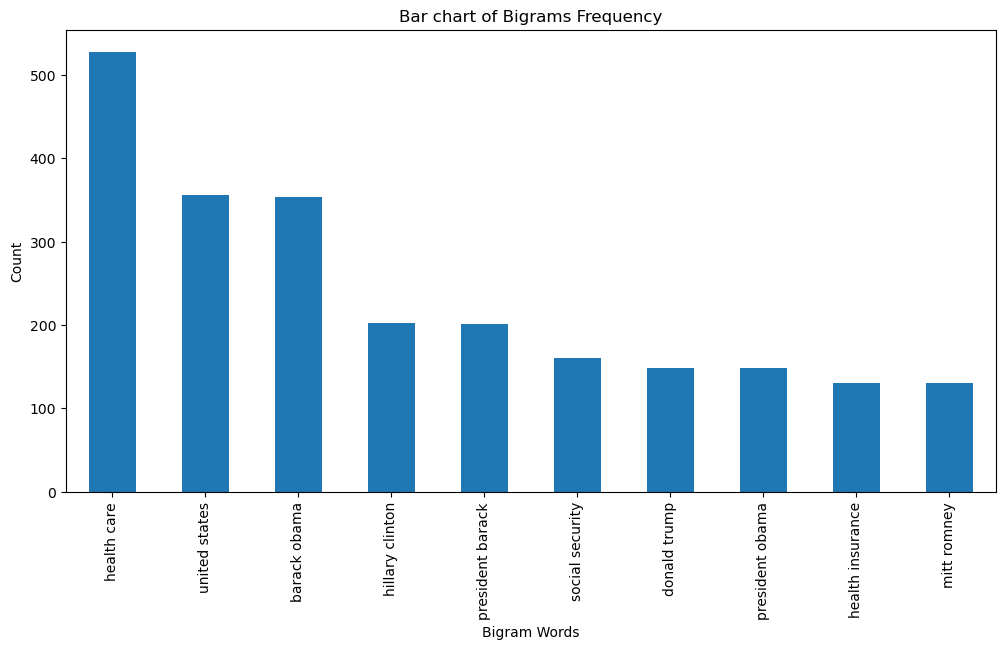

In [119]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [124]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['statement']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


In [126]:
# Save the fitted vectorizer to a file
vectorizer_filename = 'trained_count_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(count_vectorizer, f)

## Convert Input of Training Data into Feature Vectors

In [129]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,aaa,aarp,abbott,abele,ability,able,ablebodied,aboard,abolish,abolished,...,younger,youre,youth,youtube,youve,zero,zika,zip,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [134]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["label"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



,label
0,true
1,false
2,false
3,half-true
4,pants-fire


In [136]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['label'] = label_encoder.fit_transform(dataset_output['label'])

In [138]:
dataset_output

,label
0,5
1,1
2,1
3,2
4,4
...,...
12695,2
12696,3
12697,5
12698,1


In [140]:

# Show the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
print("Label encoding mapping:")
for label, encoded_value in label_mapping.items():
    print(f"'{label}' is encoded as {encoded_value}")

Label encoding mapping:
'barely-true' is encoded as 0
'false' is encoded as 1
'half-true' is encoded as 2
'mostly-true' is encoded as 3
'pants-fire' is encoded as 4
'true' is encoded as 5


In [142]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [146]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [148]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [150]:
linear_svc = SVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

SVC()


## Naive Bayes Classifier 

In [152]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## XB Boost (gradient boosting classifier) Classifier

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
multi_nb = GradientBoostingClassifier()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

GradientBoostingClassifier()


 # Decision Tree Classifier

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt = dt_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(dt)

Parameters and their values:

DecisionTreeClassifier()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [160]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.22


Precision Score of Random Forest Classifier:

0.21


Recall Score of Random Forest Classifier:

0.22


F1 Score of Random Forest Classifier:

0.21


In [161]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.20      0.27      0.23       438
           1       0.25      0.35      0.29       509
           2       0.23      0.21      0.22       507
           3       0.22      0.18      0.20       464
           4       0.19      0.10      0.13       210
           5       0.17      0.11      0.13       412

    accuracy                           0.22      2540
   macro avg       0.21      0.20      0.20      2540
weighted avg       0.21      0.22      0.21      2540



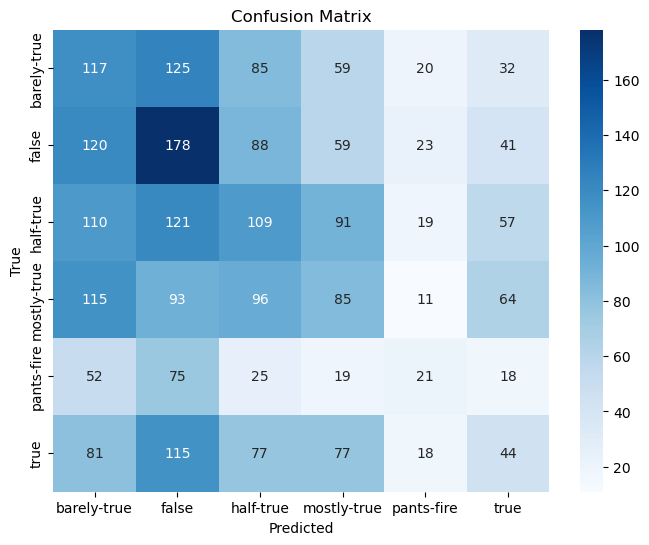

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [165]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.23

precision Score of LR_claasifier:

0.23


Recall Score of LR_claasifier:

0.23


F1 Score of LR_claasifier:

0.23


In [166]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.21      0.19      0.20       438
           1       0.25      0.27      0.26       509
           2       0.24      0.24      0.24       507
           3       0.22      0.26      0.24       464
           4       0.22      0.14      0.17       210
           5       0.26      0.24      0.25       412

    accuracy                           0.23      2540
   macro avg       0.23      0.22      0.23      2540
weighted avg       0.23      0.23      0.23      2540



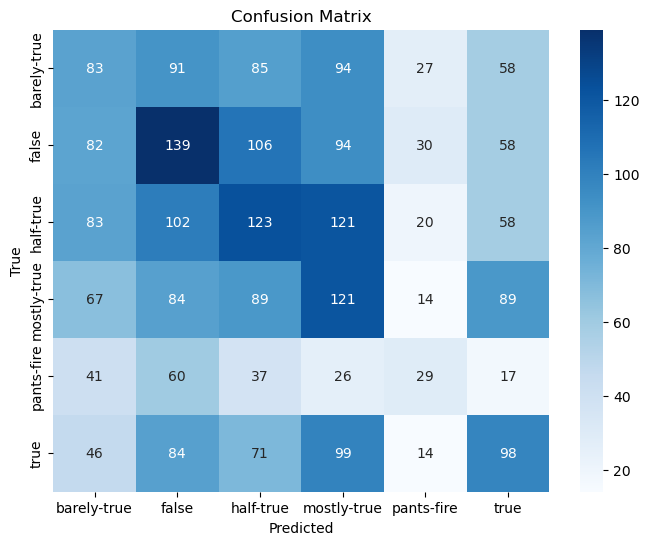

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [169]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.26


Precision Score of BernoulliNB:

0.26


Recall Score of BernoulliNB:

0.26


F1 Score of BernoulliNB:

0.25


In [170]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.26      0.19      0.22       438
           1       0.28      0.35      0.31       509
           2       0.28      0.29      0.28       507
           3       0.24      0.32      0.27       464
           4       0.21      0.08      0.11       210
           5       0.27      0.22      0.24       412

    accuracy                           0.26      2540
   macro avg       0.25      0.24      0.24      2540
weighted avg       0.26      0.26      0.25      2540



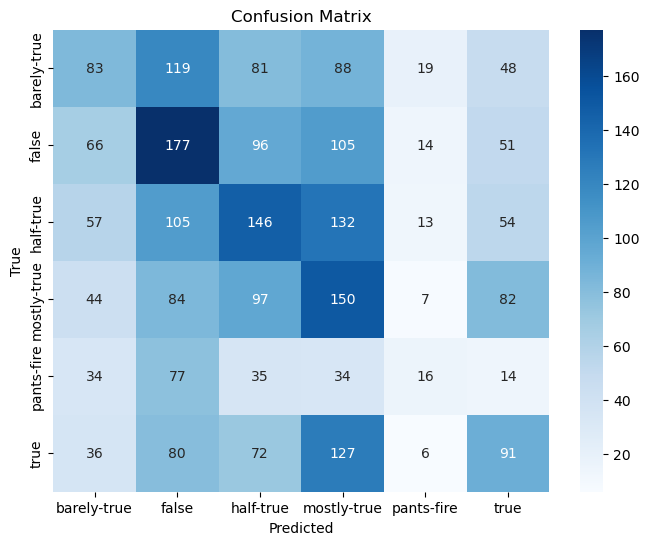

In [171]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [173]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.26

precision Score of LinearSVC:

0.24


Recall Score of LinearSVC:

0.26


F1 Score of LinearSVC:

0.23


In [174]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.25      0.10      0.14       438
           1       0.27      0.44      0.33       509
           2       0.26      0.38      0.31       507
           3       0.24      0.32      0.28       464
           4       0.00      0.00      0.00       210
           5       0.31      0.14      0.19       412

    accuracy                           0.26      2540
   macro avg       0.22      0.23      0.21      2540
weighted avg       0.24      0.26      0.23      2540



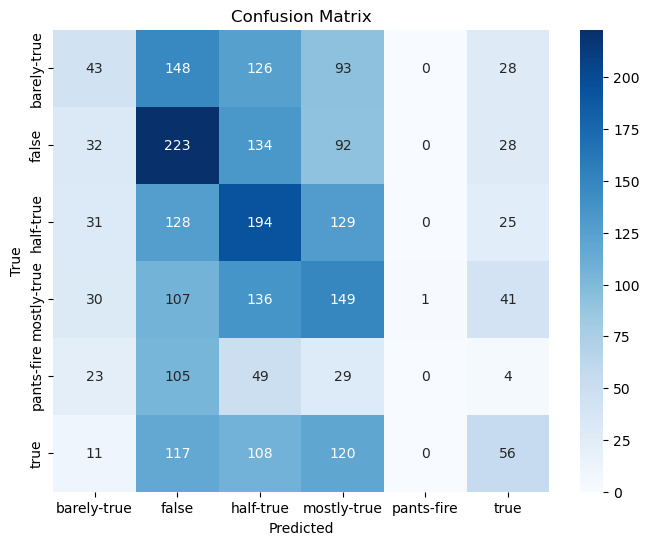

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# XG Boost gradient boosting classifier

In [177]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of gradient boosting classifier:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of gradient boosting classifier:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of gradient boosting classifier:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of gradient boosting classifier:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of gradient boosting classifier:

0.23

precision Score of gradient boosting classifier:

0.26


Recall Score of gradient boosting classifier:

0.23


F1 Score of gradient boosting classifier:

0.2


In [178]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.27      0.10      0.14       438
           1       0.29      0.15      0.20       509
           2       0.20      0.58      0.30       507
           3       0.24      0.22      0.23       464
           4       0.34      0.10      0.15       210
           5       0.30      0.11      0.16       412

    accuracy                           0.23      2540
   macro avg       0.27      0.21      0.20      2540
weighted avg       0.26      0.23      0.20      2540



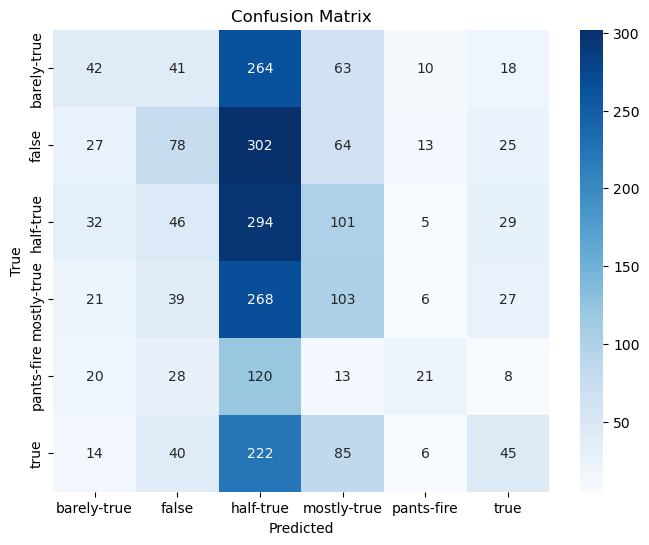

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# DecisionTreeClassifier

In [181]:
dt_classifier_predict=dt_classifier.predict(X_test)
print("\n\nAccuracy Score of DecisionTreeClassifier:")
print("================================\n")

dt_accuracy = round(accuracy_score(y_test,dt_classifier_predict),2)
print(dt_accuracy)

print("\nprecision Score of DecisionTreeClassifier:")
print("================================\n")

dt_pre = round(precision_score(y_test,dt_classifier_predict,average='weighted'),2)
print(dt_pre)

print("\n\nRecall Score of DecisionTreeClassifier:")
print("================================\n")

dt_recal = round(recall_score(y_test,dt_classifier_predict,average='weighted'),2)
print(dt_recal)

print("\n\nF1 Score of gradient DecisionTreeClassifier:")
print("================================\n")

dt_f1 = round(f1_score(y_test,dt_classifier_predict,average='weighted'),2)
print(dt_f1)




Accuracy Score of DecisionTreeClassifier:

0.23

precision Score of DecisionTreeClassifier:

0.22


Recall Score of DecisionTreeClassifier:

0.23


F1 Score of gradient DecisionTreeClassifier:

0.22


In [182]:
print(classification_report(y_test, dt_classifier_predict))

              precision    recall  f1-score   support

           0       0.20      0.15      0.17       438
           1       0.26      0.29      0.27       509
           2       0.24      0.21      0.23       507
           3       0.22      0.27      0.24       464
           4       0.18      0.13      0.15       210
           5       0.22      0.25      0.23       412

    accuracy                           0.23      2540
   macro avg       0.22      0.22      0.22      2540
weighted avg       0.22      0.23      0.22      2540



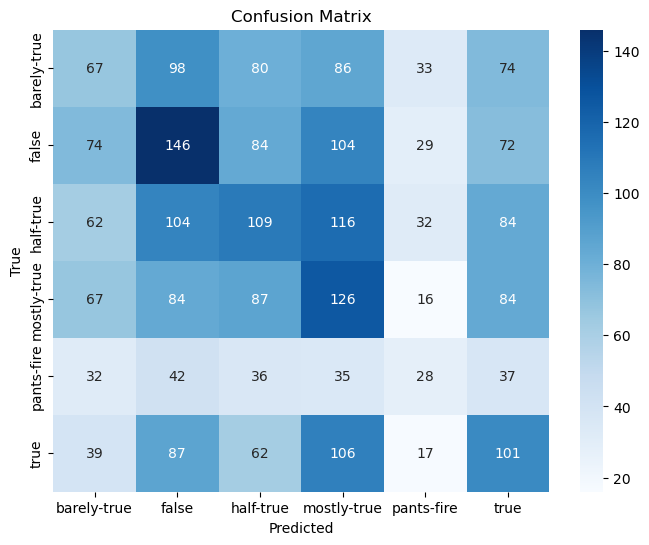

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, dt_classifier_predict)
class_names = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [185]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['SVM', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['XGBoost', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
pretty_table.add_row(['Descision Tree', dt_accuracy,dt_pre,dt_recal,dt_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy, dt_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['SVM',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['XGBoost',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
elif dt_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Decision Tree',dt_accuracy,dt_pre,dt_recal,dt_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1_score |
+---------------------+----------+-----------+--------+----------+
|    Random Forest    |   0.22   |    0.21   |  0.22  |   0.21   |
| Logistic Regression |   0.23   |    0.23   |  0.23  |   0.23   |
|     Naive Bayes     |   0.26   |    0.26   |  0.26  |   0.25   |
|         SVM         |   0.26   |    0.24   |  0.26  |   0.23   |
|       XGBoost       |   0.23   |    0.26   |  0.23  |   0.2    |
|    Descision Tree   |   0.23   |    0.22   |  0.23  |   0.22   |
+---------------------+----------+-----------+--------+----------+


Best Model:

+-------------+----------+-----------+--------+----------+
|    Model    | Accuracy | Precision | Recall | f1_score |
+-------------+----------+-----------+--------+----------+
| Naive Bayes |   0.26   |    0.26   |  0.26  |   0.25   |
+-------------+----------+----------

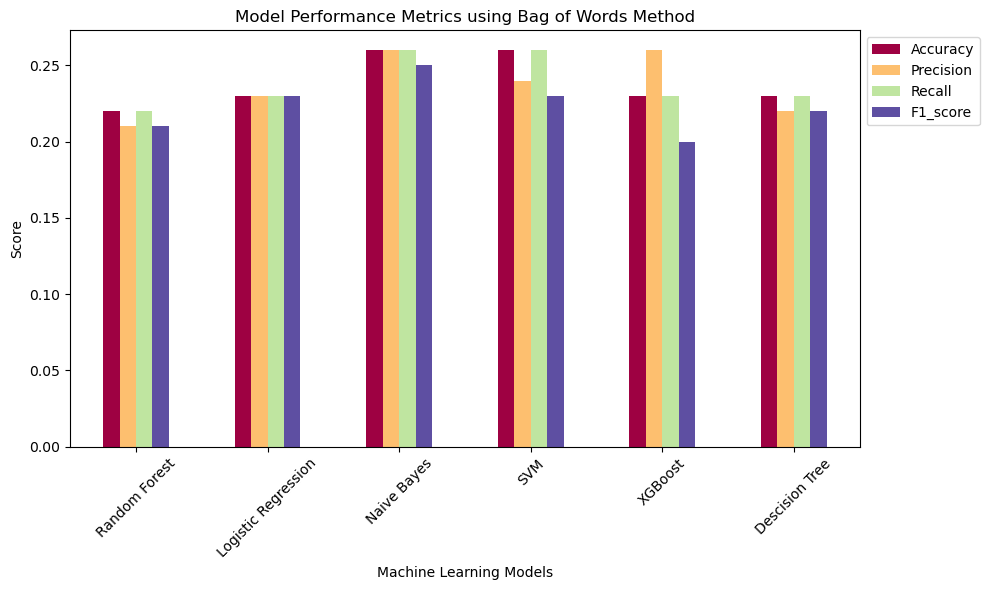

In [186]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Machine Learning Models')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)  # Rotates X-axis labels to 45 degrees
plt.tight_layout()
plt.show()

# Deep Learning Model LSTM

In [214]:
# Removing specified columns from the dataset
columns_to_remove = ['Tweet length', 'word_count', 'text_length', 'statement_length']

# Dropping the columns
dataset = dataset.drop(columns=columns_to_remove, errors='ignore')

# Display the updated dataset to confirm the columns are removed
dataset.head()

,statement,label
0,building wall usmexico border take literally y...,true
1,wisconsin pace double number layoffs year,false
2,says john mccain done nothing help vets,false
3,suzanne bonamici supports plan cut choice medi...,half-true
4,asked reporter whether hes center criminal sch...,pants-fire


In [222]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['statement'])

# Convert text to sequences of numbers
sequences = tokenizer.texts_to_sequences(dataset['statement'])
vocab_size = len(tokenizer.index_word)+ 1
vocab_size


13654

In [224]:
from keras.utils import pad_sequences

# Pad the sequences
sequences = pad_sequences(sequences, padding='pre')

# Save the max length for further use
max_length = sequences.shape[1]

# Display the max length
print("Max length of the sequences:", max_length)


Max length of the sequences: 276


In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.2, random_state=42)

In [230]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Bidirectional, SimpleRNN,GRU,LSTM,Dropout

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=2, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(6, activation='softmax')  # Adjusted final dense layer for multi-class classification
])

# Compile the model
model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, max_length))

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 276, 2)              │          27,308 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          34,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,386 (243.70 KB)

 Trainable params: 62,386 (243.70 KB)

 Non-trainable params: 0 (0.00 B)

In [232]:
history = model.fit(X_train,y_train,epochs=10,validation_data = (X_test[:-200],y_test[:-200]))

Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.2091 - loss: 1.7649 - val_accuracy: 0.2064 - val_loss: 1.7661
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 47s 148ms/step - accuracy: 0.1992 - loss: 1.7597 - val_accuracy: 0.2064 - val_loss: 1.7591
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 44s 138ms/step - accuracy: 0.2399 - loss: 1.7343 - val_accuracy: 0.2175 - val_loss: 1.7341
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.2648 - loss: 1.6883 - val_accuracy: 0.2214 - val_loss: 1.7537
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.2835 - loss: 1.6732 - val_accuracy: 0.2218 - val_loss: 1.7348
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.3003 - loss: 1.6340 - val_accuracy: 0.2021 - val_loss: 2.0604
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.3219 - loss: 1.6069 - val_accuracy: 0.2214 - val_loss: 1.7772
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.3378 - loss: 1

In [234]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and return the evaluation metrics
def evaluate_model(model_name, model, X_test, y_test):
    # Predict on the test data
    predictions = model.predict(X_test[-200:])

    # Convert predictions to class labels
    predicted_labels = predictions.argmax(axis=1)

    # Calculate the metrics
    accuracy = accuracy_score(y_test[-200:], predicted_labels)
    precision = precision_score(y_test[-200:], predicted_labels, average='weighted')
    recall = recall_score(y_test[-200:], predicted_labels, average='weighted')
    f1 = f1_score(y_test[-200:], predicted_labels, average='weighted')

    # Return the metrics as a dictionary
    return {
        'Model Name': model_name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2)
    }

# Collect metrics for model_1
results = []
results.append(evaluate_model("LSTM Model", model, X_test, y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [236]:
results

[{'Model Name': 'LSTM Model',
  'Accuracy': 0.25,
  'Precision': 0.35,
  'Recall': 0.25,
  'F1 Score': 0.22}]